In [138]:
# Dimitrios Bakalis

from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import glob
import cv2
import os

In [139]:
yes_list = []
for filename in glob.glob(r'C:\Users\mimar\Desktop\Image-Classification-on-Brain-MRI-main\data set\yes\*.jpg'): 
    image = Image.open(filename).convert('RGB')    # loading an RGB image (.jpg)
    resized_image = image.resize((400, 400))       # resizing the image to 400 x 400
    yes_list.append(resized_image)                 # saving the image to a list 

no_list = []
for filename in glob.glob(r'C:\Users\mimar\Desktop\Image-Classification-on-Brain-MRI-main\data set\no\*.jpg'): 
    image = Image.open(filename).convert('RGB')
    resized_image = image.resize((400, 400))
    no_list.append(resized_image)

Brain image with visible tumor (Class:1)


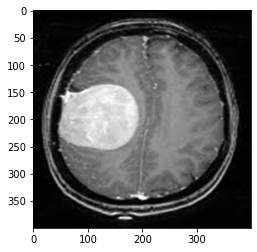

In [140]:
plt.imshow(yes_list[0], cmap='gray')
print ("Brain image with visible tumor (Class:1)")

Brain image with no tumor (Class:0)


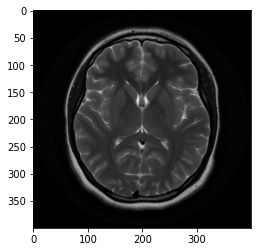

In [141]:
plt.imshow(no_list[0], cmap='gray')
print ("Brain image with no tumor (Class:0)")

In [142]:
np_yes_list = []
yes_labels_list = []

for image in yes_list:
    np_img = np.array(image)
    np_yes_list.append(np_img)
    yes_labels_list.append(1)

np_no_list = []
no_labels_list = []

for image in no_list:
    np_img = np.array(image)
    np_no_list.append(np_img)
    no_labels_list.append(0)

np_no_list.extend(np_yes_list)            # combining the two data lists into one
data = np_no_list
data = np.array(data)                     # converting the list to a numpy array

no_labels_list.extend(yes_labels_list)    # combining the two label lists into one
labels = no_labels_list   
labels = np.array(labels)                 # converting the list to a numpy array

print("data shape",data.shape)
print("labels shape",labels.shape)

data shape (249, 400, 400, 3)
labels shape (249,)


In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,random_state=109) # 70% of our data for training and the rest 30% for testing/validation

print("train data",X_train.shape)

train data (199, 400, 400, 3)


In [144]:
X_val, X_real_train, y_val, y_real_train = train_test_split(X_test, y_test, test_size=0.2,random_state=109) # 70% of our data for validation and the rest 30% for testing

print("validation data",X_val.shape)
print("test data",X_real_train.shape)

validation data (40, 400, 400, 3)
test data (10, 400, 400, 3)


In [145]:
model = tf.keras.models.Sequential([    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (400,400,3)),   # image shape 400 x 400 x 3-(RGB Channel)
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        ##
                                        tf.keras.layers.Flatten(),
                                        ##
                                        tf.keras.layers.Dense(64, activation = 'relu'),
                                        ##
                                        tf.keras.layers.Dense(1, activation = 'sigmoid')     # binary classification --> sigmoid activation funciton
                                        ])

In [146]:
model.compile(  loss = 'binary_crossentropy', 
                optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), 
                metrics = ['accuracy'])

In [147]:
model_fit =  model.fit( X_train,
                        y_train,
                        batch_size = 32,
                        epochs = 10,
                        verbose = 1,
                        validation_data=(X_val, y_val))

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 454.2497 - accuracy: 0.6030 - val_loss: 23.6476 - val_accuracy: 0.6750
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 5.5799 - accuracy: 0.8392 - val_loss: 15.5813 - val_accuracy: 0.4750
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 4.1691 - accuracy: 0.7940 - val_loss: 1.3013 - val_accuracy: 0.8000
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 1.5765 - accuracy: 0.8241 - val_loss: 4.1021 - val_accuracy: 0.8250
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.1050 - accuracy: 0.9799 - val_loss: 2.4764 - val_accuracy: 0.8000
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.1801 - accuracy: 0.9598 - val_loss: 3.7556 - val_accuracy: 0.7750
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 3.7535 - val_accuracy: 0.7750
Epoch 8/10
7/7 [=====================

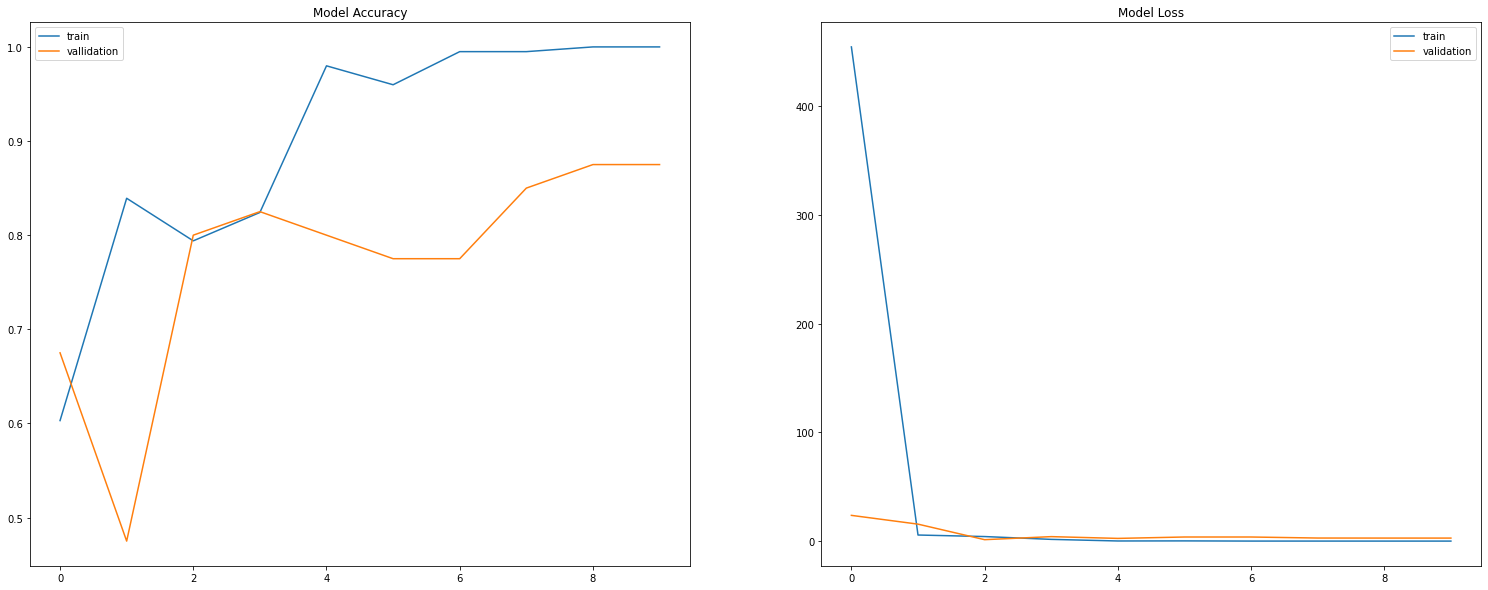

In [152]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(26, 10)

ax1.set_title('Model Accuracy')
ax1.plot(model_fit.history['accuracy'], label='train')
ax1.plot(model_fit.history['val_accuracy'], label='vallidation')
ax1.legend()

ax2.set_title('Model Loss')
ax2.plot(model_fit.history['loss'], label='train')
ax2.plot(model_fit.history['val_loss'], label='validation')
ax2.legend()

[[2 2]
 [1 5]]
Test Accuracy 0.7


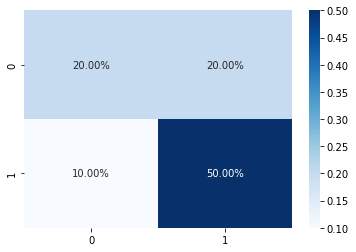

In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

pred = (model.predict(X_real_train) > 0.5).astype("int32")

mat = confusion_matrix(y_real_train,pred)
print(mat)

sns.heatmap(mat/np.sum(mat), annot=True, 
            fmt='.2%', cmap='Blues')

acc = accuracy_score(y_real_train, pred)
print("Test Accuracy", acc)

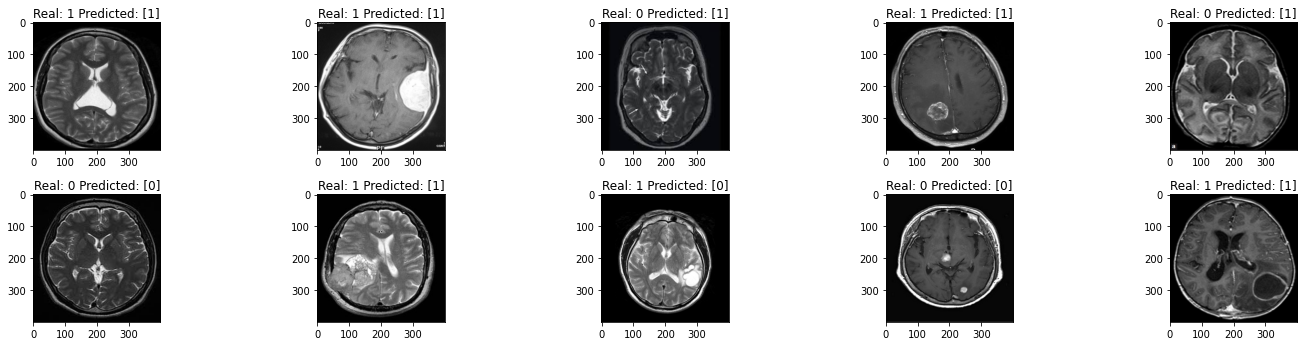

In [155]:
fig = plt.figure(figsize=(25,15))
fig.subplots_adjust(hspace=0.35, wspace=0.1)

i=-1
for image in X_real_train:
    i+=1
    ax = fig.add_subplot(5, 5, i+1)
    plt.imshow(image, cmap='gray')
    title = "Real: " + str(y_real_train[i]) + " Predicted: " + str(pred[i])
    plt.title(title)

plt.show()